In [2]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
#nlp = spacy.load("en_core_web_lg")
nlp = spacy.load("en_core_web_trf")
import numpy as np
import pandas as pd
import sys
from pathlib import Path
import re
import collections
import itertools
import pickle
from matplotlib.colors import is_color_like as color_check
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx

%matplotlib inline

In [4]:
data = pickle.load(open('../../data/processed/TEST_TaxonomistDescriptions_PLANTS.pkl', 'rb'))

In [6]:
['Abies araucana', 'Abies columbaria', 'Adansonia bahobab', 'Adansonia digitata', 
 'Adansonia grandidieri', 'Adansonia gregorii', 'Adansonia integrifolia', 
 'Adansonia madagascariensis', 'Adansonia situla', 'Adansonia somalensis', 
 'Adansonia sphaerocarpa', 'Adansonia sulcata', 'Adenium obesum subs. socotranum', 
 'Adenium socotranum', 'Agati formosa', 'Alluaudia ascendens f. variegata', 'Alluaudia procera', 
 'Aloe bainesii', 'Aloe bainesii var. barberae', 'Aloe barberae']

#data.keys()

['Abies araucana',
 'Abies columbaria',
 'Adansonia bahobab',
 'Adansonia digitata',
 'Adansonia grandidieri',
 'Adansonia gregorii',
 'Adansonia integrifolia',
 'Adansonia madagascariensis',
 'Adansonia situla',
 'Adansonia somalensis',
 'Adansonia sphaerocarpa',
 'Adansonia sulcata',
 'Adenium obesum subs. socotranum',
 'Adenium socotranum',
 'Agati formosa',
 'Alluaudia ascendens f. variegata',
 'Alluaudia procera',
 'Aloe bainesii',
 'Aloe bainesii var. barberae',
 'Aloe barberae']

In [8]:
sents = [sent for sent in data['Abies araucana']]
#cleaned_sents = [nlp(sent) for sent in sents_alt]

In [9]:
sents

['Terminal',
 'Terminal globose',
 '10–18 cm by 8-15 cm in diameter',
 'maturing in autumn about 18-36 months after pollination and holding about 180-200 seeds.',
 'Lateral branches horizontal or slightly pendant.',
 'Terminal',
 'Terminal solitary or in groups',
 'Terminal erecyt',
 'cylindrical to oblong and cucumber-shaped',
 'yellowish-brown',
 '4 cm long at first',
 'expanding to 8–15 cm long by 5–6 cm broad at pollen release',
 'with 20 whorled scales.',
 'It is armed with rigid sharply pointed',
 'spirally arranged leaves.',
 'The cones disintegrate at maturity to release the seeds.',
 'cones scales with a long triangular recurved point.',
 'This tree is usually dioecious',
 'tree with the male and female cones on separate trees',
 'though occasional individuals bear cones of both sexes.',
 'Upright',
 'cylindrical',
 'bark grey-brown',
 'resinous',
 'smooth',
 'very thick',
 'wrinkled',
 'breaking up into plates and marked by rings made by old branch scars.',
 'Arranged spirall

In [10]:
species = 'Abies araucana'

In [289]:
def triplefy(sent):
    
    triples = []
    sent = nlp(sent)
    noun_current = species
    
    quantities = [sent[ent[0].i : ent[-1].i +2] for ent in sent.ents if ent.label_ == 'QUANTITY']
    quantities_idx = [sent[ent[-1].i +1].text for ent in sent.ents if ent.label_ == 'QUANTITY']
    
    for chunk in sent.noun_chunks:
        
        #print(chunk)
        #### SENTS WITH NOMRAL SUBJECT
        if chunk.root.dep_ == 'nsubj':
            triples.append((species, 'has', chunk.root.lemma_))
            # Set new current chunk
            noun_current = chunk.root.lemma_
            # Check for amods of NOUNS
            for tok in chunk:
                if tok == chunk.root:
                    continue
                elif tok.dep_ == 'amod':
                    triples.append((noun_current, 'amod', tok.lemma_))
                elif tok.dep_ == 'compound':
                    triples.append((noun_current, 'compound', tok.lemma_))        
        
        # Extract the VERB        
        if chunk.root.head.pos_ in ['AUX', 'VERB']:
            verb = chunk.root.head
            print(verb)
            
            # Get the verb tree
            for child in verb.children:
                #print(child)
                continue
                
        
                
                
            
            '''
            for token in verb.children:
                if token.dep_ == 'acomp':
                    # Check for additional modifiers
                    if sent[token.i-1].dep_ in ['advmod', 'npadvmod']:
                        triples.append((noun_current, verb.lemma_, sent[token.i-1 : token.i+1].text))
                    # Correct for hyphens
                    elif sent[token.i-2].dep_ in ['advmod', 'npadvmod']:
                        triples.append((noun_current, verb.lemma_, sent[token.i-2 : token.i+1].text))
                    else:
                        triples.append((noun_current, verb.lemma_, token.lemma_))
                
                # Direct object
                elif token.dep_ == 'dobj':
                    # First try to find NOUN
                    
                    # Else append direct object
                
                # object of a preposition
                elif token.dep_ == 'prep':
                    # Find next
                    for child in token.children:
                        if child.pos_ == 'NOUN':
                            triples.append((noun_current, verb.lemma_, child.lemma_))
                            # Find stuff related to noun
                            for grandchild in child.children:
                                if grandchild.dep_ == 'nummod':
                                    triples.append((child.lemma_, 'nummod', grandchild.lemma_))   
                '''

            

                

    return triples

In [290]:
doc = sents[3]
print(doc)
test = nlp(doc)

maturing in autumn about 18-36 months after pollination and holding about 180-200 seeds.


In [291]:
#list(test[1].subtree)[2]
#list(test[1].subtree)[2].right_edge

In [292]:
triplefy(doc) 

holding


[]

In [293]:
displacy.render(nlp(doc), style="dep",)# options={'compact':True})

In [131]:
displacy.render(nlp(doc), style="ent")

In [244]:
for idx, sent in enumerate(sents):
    print(sent)
    print((triplefy(sent), idx))
    print('\n')

Terminal
([], 0)


Terminal globose
([], 1)


10–18 cm by 8-15 cm in diameter
([], 2)


maturing in autumn about 18-36 months after pollination and holding about 180-200 seeds.
([('Abies araucana', 'hold', 'about')], 3)


Lateral branches horizontal or slightly pendant.
([], 4)


Terminal
([], 5)


Terminal solitary or in groups
([], 6)


Terminal erecyt
([], 7)


cylindrical to oblong and cucumber-shaped
([], 8)


yellowish-brown
([], 9)


4 cm long at first
([], 10)


expanding to 8–15 cm long by 5–6 cm broad at pollen release
([], 11)


with 20 whorled scales.
([], 12)


It is armed with rigid sharply pointed
([('Abies araucana', 'arm', 'It'), ('Abies araucana', 'arm', 'is'), ('Abies araucana', 'arm', 'with rigid sharply pointed')], 13)


spirally arranged leaves.
([], 14)


The cones disintegrate at maturity to release the seeds.
([('Abies araucana', 'has', 'cone'), ('cone', 'disintegrate', 'The'), ('cone', 'disintegrate', 'at maturity'), ('cone', 'disintegrate', 'to'), ('cone', 'r

In [245]:
knowledge_list = [(triplefy(sent),) for sent in tqdm(sents)]

100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 15.41it/s]


In [246]:
knowledge_list_flat = [RDF for RDF_list in knowledge_list for RDF in RDF_list]

In [247]:
source = [source[0].lower().strip() for knowledge in knowledge_list_flat for source in knowledge]

relation = [source[1].lower().strip() for knowledge in knowledge_list_flat for source in knowledge]

target = [source[2].lower().strip() for knowledge in knowledge_list_flat for source in knowledge]

In [248]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relation})

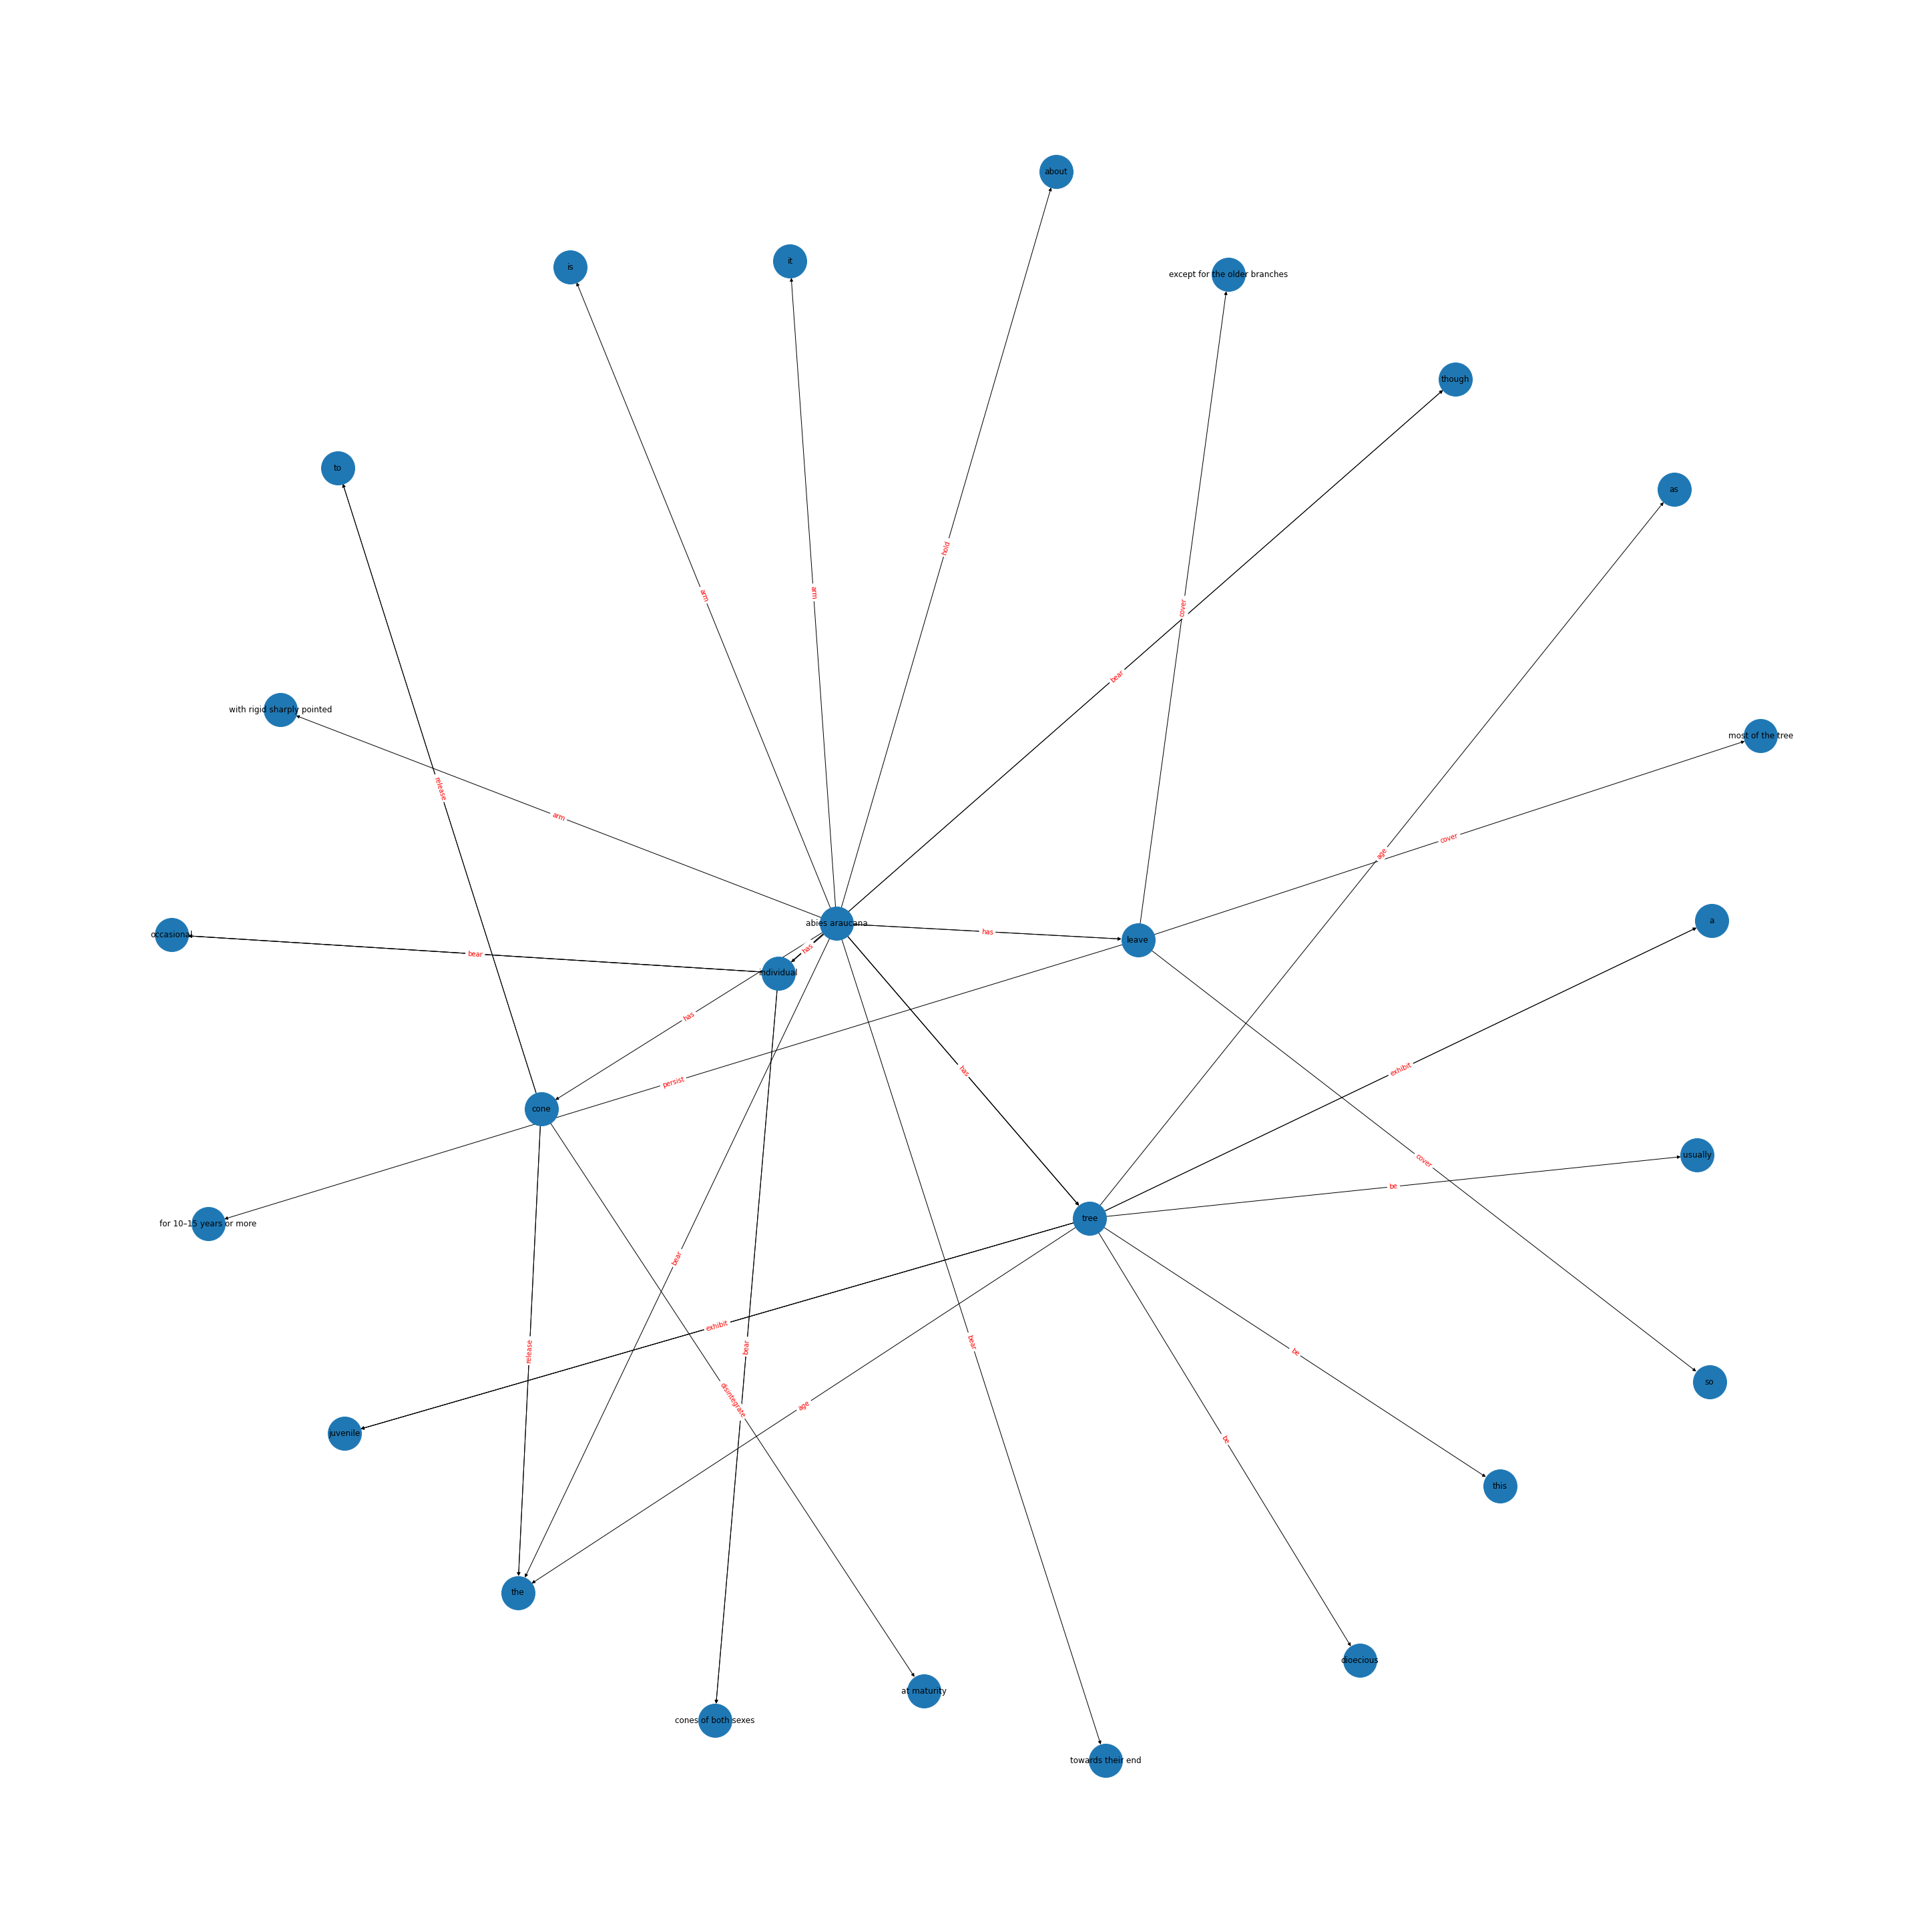

In [249]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(40, 40))
labels = dict(zip(list(zip(kg_df.source, kg_df.target)),
                  kg_df['edge'].tolist()))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_size=2500, pos = pos)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels,
                                 font_color='red')
plt.show()

In [ ]:
kg_df